- [Here](https://s3-us-west-2.amazonaws.com/ga-dat-2015-suneel/datasets/breast-cancer.csv) is the dataset.
- [Here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) is a description of the data. Ignore column 0 as it is merely the ID of a patient record.

In [1]:
# DATASET DOWNLOADED
# IGNORE COLUMN 0
# COLUMN 1 IS THE Y VARIABLE

## 1. Read in the data

In [1]:
# LOAD DATASET INTO PYTHON ENVIRONMENT

import pandas as pd
df = pd.read_csv('breast-cancer.csv', sep=",", header=None)

In [2]:
# VERIFY THAT DATASET IS OF PROPER DIMENSION

print df.loc[0:5,0:8]
df.shape

          0  1      2      3       4       5        6        7       8
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980
5    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578


(569, 32)

## 2. Separate the data into feature and target.

In [3]:
# INITIAL FEATURE WRANGLING AND PREPROCESSING
# COLUMN 0 IS NOT RELEVANT, COLUMN 1 IS y, THE REST COMPRISE THE FEATURE MATRIX X
# GOAL IS BINARY FACTORS FOR THE y FOR THE LOGISTIC REGRESSION PREPARATION

import pandas as pd
from sklearn.preprocessing import LabelEncoder
y = df.loc[:, 1].values
X = df.loc[:, 2:].values

# INSTANTIATE LABELENCODER CLASS
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

## 3. Create and evaluate using cross_val_score and 5 folds.
- What is the mean accuracy?
- What is the standard deviation of accuracy?

In [6]:
# CREATE MODEL (LOGISTIC REGRESSION CONSISTENT WITH ACTUAL STUDY) AND EVALUATE USING CROSS_VAL_SCORE AND 5 FOLDS
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', C=1)

In [12]:
lr.fit(X, y)
print('INITIAL MODEL ACCURACY (No cross validation: ' , lr.score(X,y))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, scoring='accuracy', cv=5)

print('CV 5 Fold Scores', scores)
print('CV 5 Fold Mean accuracy', scores.mean())
print('CV 5 Fold STD of accuracy', scores.std())

('INITIAL MODEL ACCURACY (No cross validation: ', 0.95957820738137078)
('CV 5 Fold Scores', array([ 0.93043478,  0.93913043,  0.97345133,  0.95575221,  0.96460177]))
('CV 5 Fold Mean accuracy', 0.9526741054251634)
('CV 5 Fold STD of accuracy', 0.015883673194698897)


## 4. Get a classification report to identify type 1, type 2 errors.
- Use train_test_split to run your model once, with a test size of 0.33
- Make predictions on the test set
- Compare the predictions to the answers to determine the classification report

Accuracy: 0.9521
[[119   4]
 [  5  60]]
Total Misclassified Samples (sum off-diagonals): 9
Confusion Matrix for Type I and Type II Error


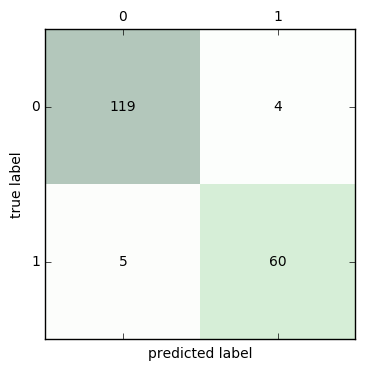

Classification Report: 
             precision    recall  f1-score   support

     Benign       0.96      0.97      0.96       123
  Malignant       0.94      0.92      0.93        65

avg / total       0.95      0.95      0.95       188



In [16]:
# DIVIDE DATASET INTO SEPARATE TRAINING DATASET - TEST SIZE SET TO 0.33 - TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

lr.fit(X_train, y_train)

# print lr.score(X_test, y_test)
# MAKE A PREDICTION ON THE TEST SET AS DIRECTED
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

# COMPARE THE PREDICTIONS TO THE ANSWERS TO DETERMINE THE CLASSIFICATION REPORT
print('Total Misclassified Samples (sum off-diagonals): %d' % (y_test != y_pred).sum())
## CREATE confmat variable being careful of the order of y_true and y_pred
##


import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Greens, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
print('Confusion Matrix for Type I and Type II Error')
plt.show()

from sklearn.metrics import classification_report
target_names = ['Benign', 'Malignant']
y_true = y_test
print('Classification Report: ')
print(classification_report(y_true, y_pred, target_names=target_names))

'Type I Error' is the incorrect rejection of a true null hypothesis (False Positive) while a 'Type II Error' is the failure to reject a false null hypothesis (False Negative).  In the present example, a Type I Error is detecting a malignant ('1') tumor that is not present (should have been a '0'), while a Type II error is failing to detect a true malignancy (assiging '0' to a '1'). 

Here, there were 4 False Positives (Type I Error corresponding to the upper-right quadrant) and 5 False Negatives (Type II Error corresponding to the bottom-left quadrant).

The True Positive Rate for our '1' Class is synonymous with "Recall": TP/(FN + TP) = 60/(5 + 60) = 0.92. Precision for '1' is calculated with TP / (FP + TP) = 60 / (4 + 60) = 0.94.

## 5. Scale the data and see if that improves the score.

In [29]:
# STANDARDIZE COLUMNS OF THE DATASET BEFORE FEEDING THEM TO THE LINEAR CLASSIFIER
# CREATE PIPELINE FOR TWO-STEP PROCESS
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([ ('scl', StandardScaler()), ('clf', LogisticRegression(random_state=1)), ])

pipe_lr.fit(X_train, y_train)

print('Scaled/Standardized Improved Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Scaled/Standardized Improved Test Accuracy: 0.9681


In [27]:
pipe_lr

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('cls', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

Scaling the data improves the accuracy and is always recommended for Logistic Regressions (especially in a medical study such as this one where the tumor characteristics had different measures). Scaling is also necessary for proper regularization and parameter tuning (see below).

## 6. Tune the model using automated parametric grid search via LogisticRegressionCV. Explain your intution behind what is being tuned.

In [22]:
# TUNE THE MODEL USING AUTOMATED GRID SEARCH VIA 'LogisticRegressionCV' - NOTE GridSearchCV has been implemented
# below since LogisticRegressionCV has been deprecated
from sklearn.model_selection import GridSearchCV

In [34]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range}]

pipe_grid_search = GridSearchCV(pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

pipe_grid_search = pipe_grid_search.fit(X_train, y_train)


print('Grid Search Best Score: %.4f' % pipe_grid_search.best_score_)
print('Grid Search Best Parameter for C: ')
print pipe_grid_search.best_params_

Grid Search Best Score: 0.9816
Grid Search Best Parameter for C: 
{'clf__C': 0.1}


Intuition:  As described in further detail below, what is being tuned is 'c', the inverse of 'lambda', which is the key component of a Logistic Regression's coefficient regularization.  Regularization shrinks the coefficients via a penalty term. This action proves useful in handling collinearity (high correlation of columns in the feature space), filtering out noise, and preventing overfitting. The small 0.1 value of 'c' implies that a rather significant amount of regularization took place because the lambda of the regularization term must have been high.

### Q: What should we do to prevent overfitting so our model generalizes well to the test data?

### Q: What was the best C?

## 7. Create Two Plots that describe the data and discuss your results

/Users/toddmoffett1/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


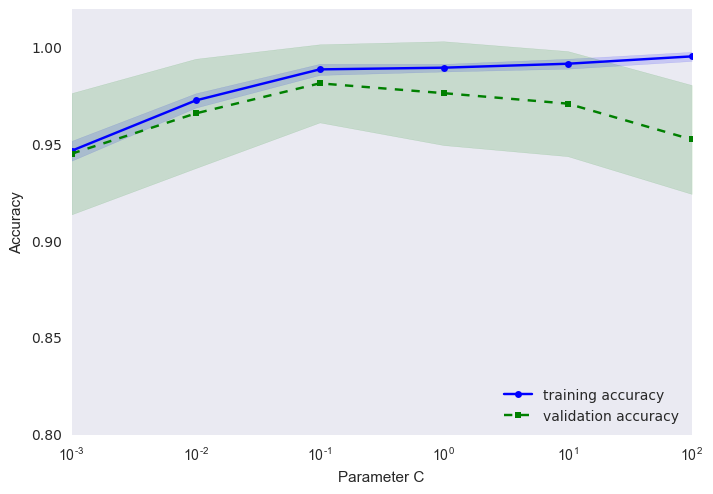

NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV


In [35]:
# CREATE TWO PLOTS THAT DESCRIBE THE DATA AND DISCUSS YOUR RESULTS
# PLOT 1: VALIDATION CURVE WITH RESPECT TO C PARAMETER

from sklearn.learning_curve import validation_curve
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr, X=X_train, y=y_train, param_name='clf__C', 
                                             param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')

plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.02])
plt.show()
print('NOTE:  This plot confirms the best choice of C as 0.1 made by the GridSearchCV')

Succinctly stated, choosing a model below where 'C' is 0.1 could lead to underfitting whereas choosing a model above that level could lead to overfitting. The 'C' parameter has been discussed in some length above and will also be addressed in this study's conclusion.

NOTE:  This plot confirms the above-mentioned Classification Report with its excellent results.


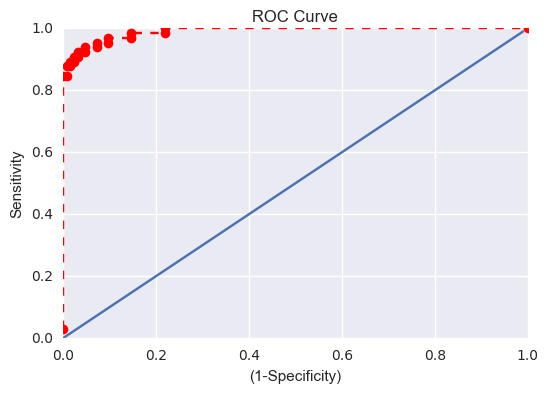

In [36]:
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline
import seaborn
prob = lr.predict_proba(X_test)[:,1]
fpr, sensitivity, _ = metrics.roc_curve(y_test, prob)
plt.plot(fpr,sensitivity,marker='o',linestyle='--',color='r')
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel('(1-Specificity)')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
print('NOTE:  This plot confirms the above-mentioned Classification Report with its excellent results.')

The Receiver Operating Characteristic (ROC) curve illustrates the performance of a binary classifier system such as the one we studied here.  The Y-axis of the ROC curve is the True Positive Rate (Sensitivity) and the X-axis is the False Positive Rate (1-Specificity) or the 'Fall-Out'.  Hence, the ROC curve measures a model's Sensitivity as a function of its Fall-Out.  In the present case, we see our model performs nearly impeccably and yields only a minimal tradeoff between False Positive and Sensitivity.

## 8. Provide a one-sentence summary for a non-technical audience. Then provide a longer paragraph-length technical explanation.

In sum, this work validates the Wisconsin Breast Cancer study and demonstrates its resulting thesis that malignant and benign tumors are linearly separable is statistically sound using a cross-validated logistic regression.

In [27]:
from IPython.display import display, Math, Latex
display(Math(r'J(w) =  \sum_{i=1}^n\left[ \left( -y^{(i)}*log(\phi(z^{(i)}) ) - (1-y^{(i)}) \right) * log(1 - \phi(z^{(i)})) \right] + \frac{\lambda}{2} \parallel w  \parallel ^2'))
display(Math(r' C = \frac{1}{\lambda}'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>